# TEHNICI DE REDUCERE A DIMENSIUNILOR

## Introducere

Principala caracteristică a algoritmilor de învățare nesupravegheată, în comparație cu metodele de clasificare și regresie, este că datele de intrare sunt neetichetate (adică nu se dau etichete sau clase) și că algoritmul învață structura datelor fără niciun ajutor. Acest lucru creează două diferențe principale. În primul rând, ne permite să procesăm cantități mari de date, deoarece datele nu trebuie să fie etichetate manual. În al doilea rând, este dificil să se evalueze calitatea unui algoritm nesupravegheat din cauza absenței unei metrici explicite de "calitate", așa cum se utilizează în învățarea supravegheată.

Una dintre cele mai comune sarcini în învățarea nesupravegheată este reducerea dimensionalității. Pe de o parte, reducerea dimensionalității poate ajuta la vizualizarea datelor (de exemplu, metoda t-SNE), în timp ce, pe de altă parte, poate ajuta la tratarea multicoliniarității datelor și la pregătirea datelor pentru o metodă de învățare supravegheată.

# Principal Component Analysis (PCA) - Analiza componentelor principale

## Intuiție, teorii și probleme de aplicare

Analiza componentelor principale este una dintre cele mai simple, mai intuitive și mai frecvent utilizate metode de reducere a dimensionalității, proiectării datelor pe subspații ortogonale caracteristicilor sale. Sa intelegem intuitia din spatele PCA impreuna.

Singular value decomposition (SVD) a matricii $X$:

$$\Large X = UDV^T,$$

unde $U \in R^{m \times m}$,  $V \in R^{n \times n}$ - sunt matrici ortogonale, si $D \in R^{m \times n}$ - este o matrice diagonala:

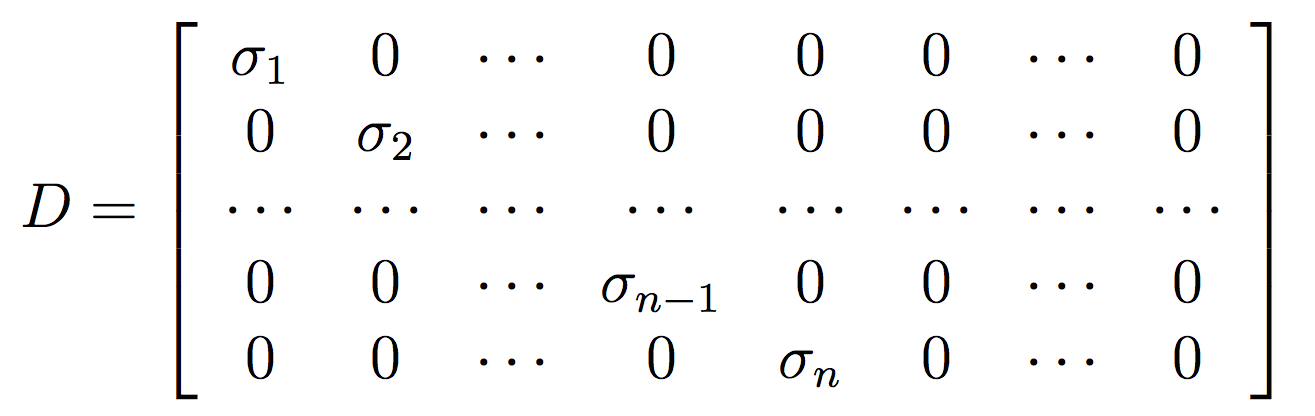



### Algoritmul Principal Components Analysis
1. Defineste $k<d$ – o noua dimensiune
2. Scaleaza $X$: 
 - schimba $\Large x^{(i)}$ in $\Large  x^{(i)} - \frac{1}{n} \sum_{i=1}^{n}{x^{(i)}}$
 - $\Large  \sigma_j^2 = \frac{1}{n} \sum_{i=1}^{n}{(x^{(i)})^2}$
 - change $\Large x_j^{(i)}$ to $\Large \frac{x_j^{(i)}}{\sigma_j}$ 
4. Calculeaza SVD $X$:
$$\Large X = UDV^T$$
5. Defineste $V =$ [$k$ cele mai de la stanga coloane ale lui $V$]
6. Returneaza $$\Large Z = XV \in \mathbb{R}^{m \times k}$$

## Exemplu 2D

In [ ]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


Proportion of variance explained by each component:
1st component - 0.94,
2nd component - 0.06

Directions of principal components:
1st component: [-0.57532172  0.81792721] 
2nd component: [-0.81792721 -0.57532172]


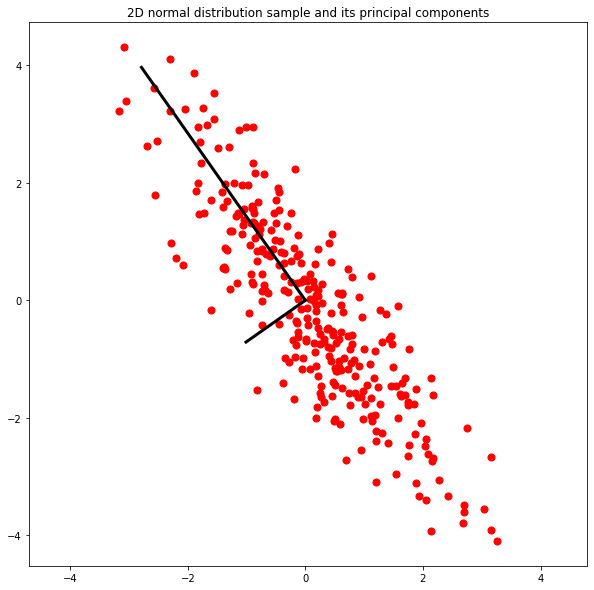

In [ ]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0], 
                [-2.0, 3.0]])
X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)
print('Proportion of variance explained by each component:\n' +\
      '1st component - %.2f,\n2nd component - %.2f\n' %
      tuple(pca.explained_variance_ratio_))
print('Directions of principal components:\n' +\
      '1st component:', pca.components_[0],
      '\n2nd component:', pca.components_[1])

plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], s=50, c='r')
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('2D normal distribution sample and its principal components')
plt.show()

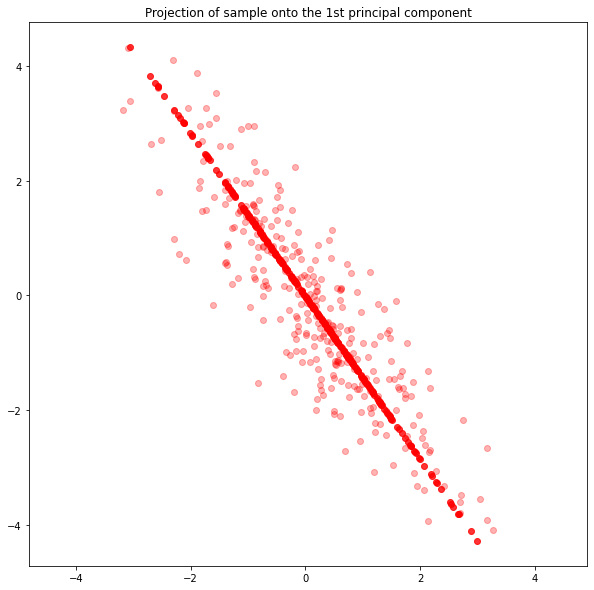

In [ ]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

Am redus la jumătate dimensionalitatea spațiului caracteristicilor, păstrând în același timp cele mai semnificative caracteristici. Aceasta este ideea de bază a reducerii dimensionale - aproximarea unui set de date multidimensionale folosind date cu o dimensiune mai mică, păstrând în același timp cât mai multe informații despre setul de date.

## Vizualizarea seturilor de date cu mai multe dimensiuni

### Iris Dataset

Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


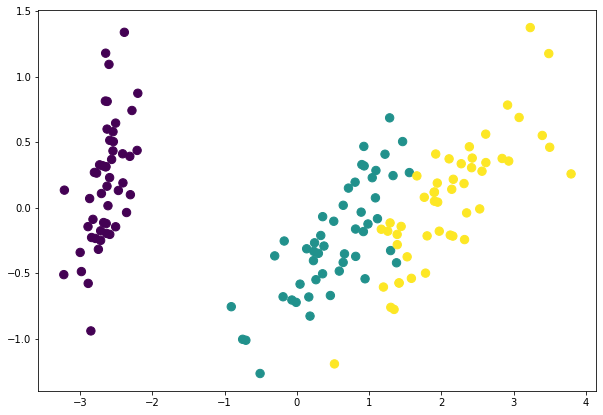

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))
plt.figure(figsize=(10,7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap='viridis')
plt.show()

Metoda t-SNE, vizualizarea cirfrelor scrise de mana

### Cifre scrise de mână


Projecting 64-dimensional data to 2D


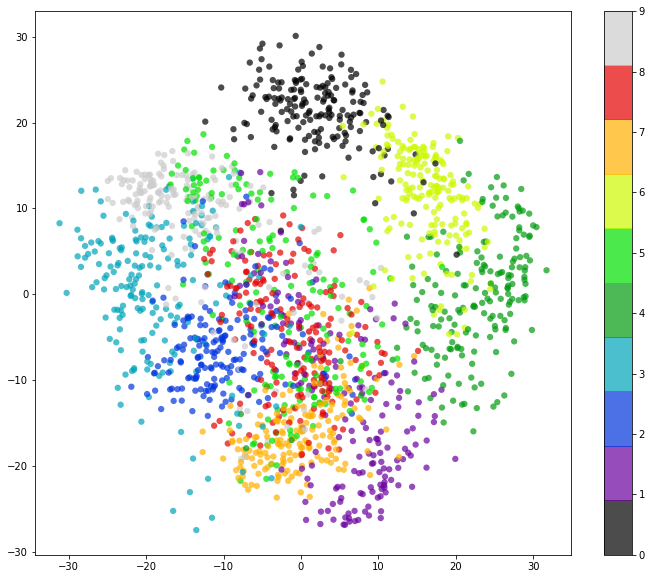

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

Sa ne uitam la primile doua componente:

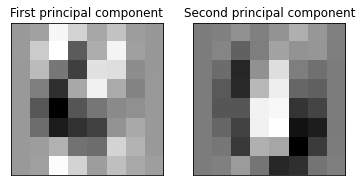

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im = pca.components_[0]
ax1.imshow(im.reshape((8, 8)), cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('First principal component')

im = pca.components_[1]
ax2.imshow(im.reshape((8, 8)), cmap='binary')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Second principal component')
plt.show()

## Compresiunea datelor


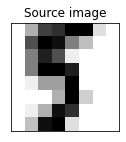

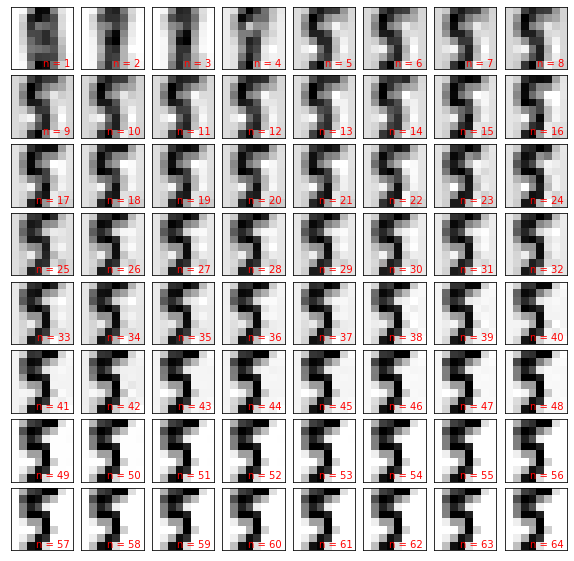

In [ ]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

Câte componente să alegeți? De obicei, se lasă cel puțin 90% din variația datelor pentru a fi păstrată.



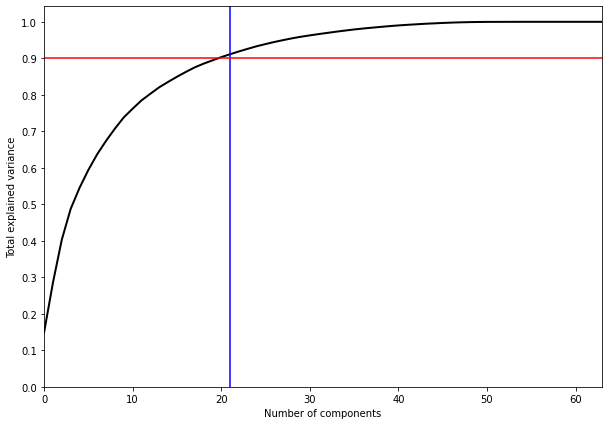

In [ ]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()

In [ ]:
pca = PCA(0.9).fit(X)
print('We need %d components to explain 90%% of variance' 
      % pca.n_components_)

We need 21 components to explain 90% of variance


### PCA ca preprocesare
PCA servește adesea ca tehnică de preprocesare. Să ne uităm la o sarcină de recunoaștere a fețelor

In [ ]:
%%time
from sklearn import datasets
from sklearn.model_selection import train_test_split

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, 
                resize=0.4, data_home='../../data/faces')

print('%d objects, %d features, %d classes' % (lfw_people.data.shape[0],
      lfw_people.data.shape[1], len(lfw_people.target_names)))
print('\nPersons:')
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair
CPU times: user 13.4 s, sys: 3.87 s, total: 17.2 s
Wall time: 30.6 s


Distributia claselor target

In [ ]:
for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

Ariel Sharon: 77 photos.
Colin Powell: 236 photos.
Donald Rumsfeld: 121 photos.
George W Bush: 530 photos.
Gerhard Schroeder: 109 photos.
Hugo Chavez: 71 photos.
Jacques Chirac: 52 photos.
Jean Chretien: 55 photos.
John Ashcroft: 53 photos.
Junichiro Koizumi: 60 photos.
Serena Williams: 52 photos.
Tony Blair: 144 photos.


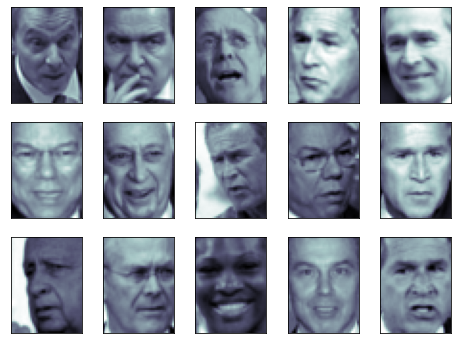

In [ ]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(lfw_people.data, lfw_people.target, random_state=0)

print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

Train size: 1170 Test size: 390


Aici recurgem la ```RandomizedPCA``` (un algoritm un pic mai eficient) pentru a găsi primele 100 de componente principale care rețin o varianță >90%.


100 principal components explain 92.70% of variance


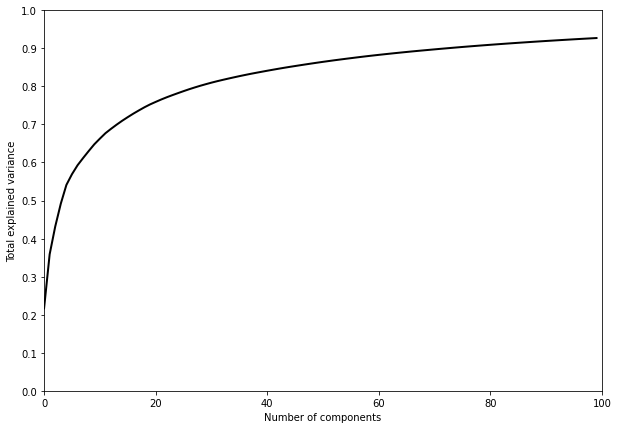

In [ ]:
pca = PCA(n_components=100, svd_solver='randomized')
pca.fit(X_train)

print('100 principal components explain %.2f%% of variance' %
      (100 * np.cumsum(pca.explained_variance_ratio_)[-1]))
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color='k')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

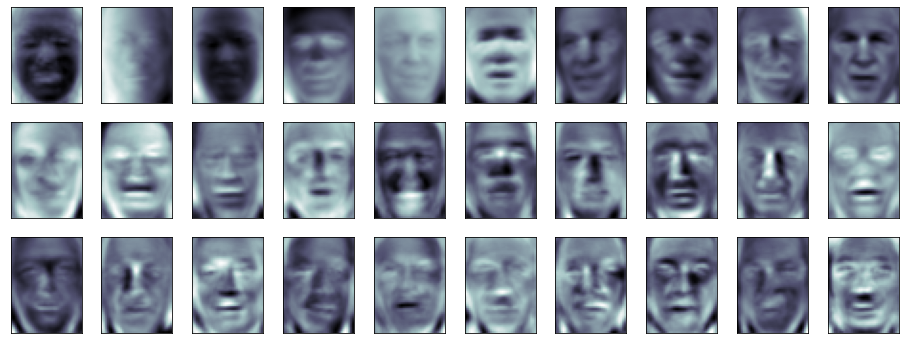

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap='bone')

Cum arata fata medie? :D 

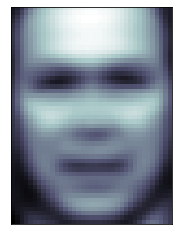

In [ ]:
plt.imshow(pca.mean_.reshape((50, 37)), cmap='bone')
plt.xticks([])
plt.yticks([])
plt.show()

Acum, să efectuăm clasificarea după ce am redus dimensionalitatea de la 1850 de caracteristici la doar 100. Vom aplica un clasificator softmax, cunoscut și ca regresie logistică multinomială.

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

CPU times: user 28.1 ms, sys: 5.02 ms, total: 33.1 ms
Wall time: 22.8 ms


In [ ]:
clf = LogisticRegression(multi_class='multinomial', 
                         random_state=17, solver='lbfgs', 
                         max_iter=10000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.720513
                   precision    recall  f1-score   support

     Ariel Sharon       0.47      0.53      0.50        15
     Colin Powell       0.73      0.72      0.73        65
  Donald Rumsfeld       0.55      0.55      0.55        29
    George W Bush       0.85      0.80      0.83       133
Gerhard Schroeder       0.69      0.67      0.68        33
      Hugo Chavez       0.72      0.81      0.76        16
   Jacques Chirac       0.60      0.25      0.35        12
    Jean Chretien       0.38      0.50      0.43        10
    John Ashcroft       0.87      0.72      0.79        18
Junichiro Koizumi       0.58      1.00      0.73        11
  Serena Williams       0.72      0.68      0.70        19
       Tony Blair       0.68      0.79      0.73        29

         accuracy                           0.72       390
        macro avg       0.65      0.67      0.65       390
     weighted avg       0.73      0.72      0.72       390



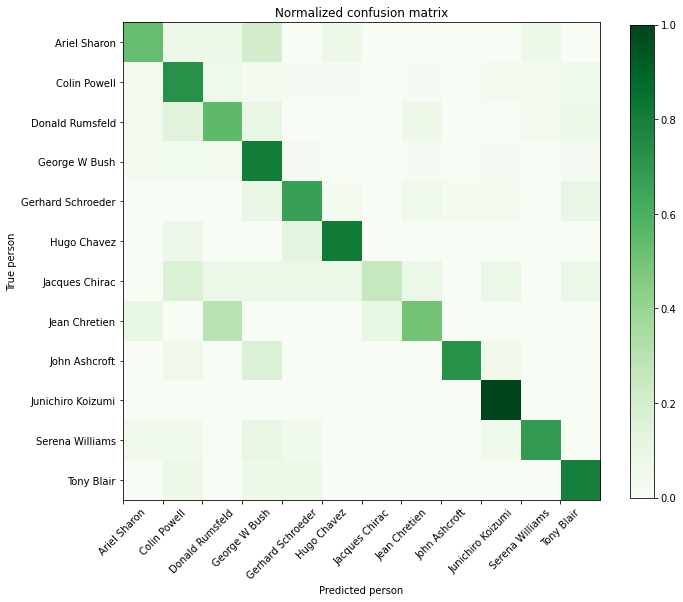

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

print("Accuracy: %f" % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

M = confusion_matrix(y_test, y_pred)
M_normalized = M.astype('float') / M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalized, interpolation='nearest', cmap='Greens')
plt.colorbar(im, shrink=0.71)
tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('True person')
plt.xlabel('Predicted person')
plt.title('Normalized confusion matrix')
plt.show()

### Alte resurse utile la selectarea caracteristicilor

https://medium.com/analytics-vidhya/feature-selection-methods-with-code-examples-a78439477cd4